# Text Classification using Naive Bayes Classifier

Reference: https://www.youtube.com/watch?v=60pqgfT5tZM&ab_channel=Simplilearn

In [1]:
#loading the necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [2]:
#Defining the categories
categories = ['alt.atheism','comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
              'comp.sys.mac.hardware','comp.windows.x','misc.forsale','rec.autos','rec.motorcycles',
              'rec.sport.baseball','rec.sport.hockey','sci.crypt','sci.electronics','sci.med','sci.space',
              'soc.religion.christian','talk.politics.guns','talk.politics.mideast','talk.politics.misc','talk.religion.misc']

#training the data on these categories
train = fetch_20newsgroups(subset = 'train', categories = categories)

#testing the data on these categories
test = fetch_20newsgroups(subset = 'test', categories = categories)

#printing the training data
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [3]:
# no.of articles
print(f'The no. of articles in the train data: {len(train.data)}')
print(f'The no. of articles in the test data: {len(test.data)}')

The no. of articles in the train data: 11314
The no. of articles in the test data: 7532


In [4]:
#importing the necessary packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

#creating a model based on the multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

#training the model with the train data
model.fit(train.data, train.target)

#creating the labels for the test data
labels = model.predict(test.data)

Text(73.653125, 0.5, 'Predicted label')

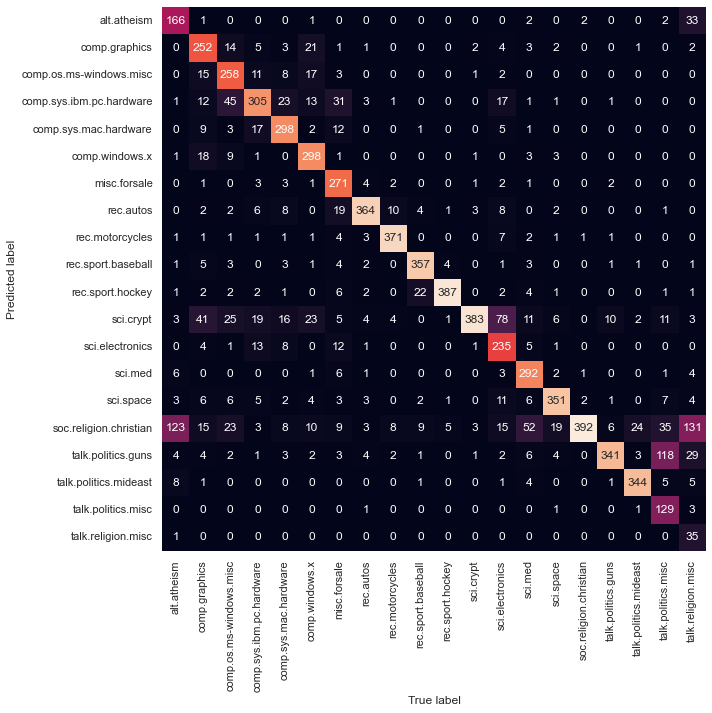

In [5]:
#creating a confusion matrix and heat map
from sklearn.metrics import confusion_matrix,accuracy_score
mat = confusion_matrix(test.target, labels)
plt.figure(figsize=(10,10))
sns.heatmap(mat.T, square = True, annot = True, fmt='d', cbar=False, 
           xticklabels = train.target_names, yticklabels = train.target_names)

#plotting the heatmap of confusion matrix
plt.xlabel('True label')
plt.ylabel('Predicted label')

In [9]:
#check accuracy
print(f'The accuracy of the model: {round(accuracy_score(test.target, labels)*100,2)} %')

The accuracy of the model: 77.39 %


In [10]:
#predicting category based on the new data
def predict_category(s, train=train,model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [11]:
#making predictions on the user input string - 1
text_ip = input('Enter a text to classify: ')

predict_category(text_ip)

Enter a text to classify: Jesus Christ


'soc.religion.christian'

In [13]:
#making predictions on the user input string - 2
text_ip = input('Enter a text to classify: ')

predict_category(text_ip)

Enter a text to classify: Driverless cars are the future


'rec.autos'

In [14]:
#making predictions on the user input string - 3
text_ip = input('Enter a text to classify: ')

predict_category(text_ip)

Enter a text to classify: What causes cancer cells to activate in a normal body ?


'sci.med'

In [16]:
#making predictions on the user input string - 4
text_ip = input('Enter a text to classify: ')

predict_category(text_ip)

Enter a text to classify: Narendra Damodardas Modi serving as a 14th prime minister of India since 2014.


'talk.politics.mideast'

In [19]:
# save the model
import joblib

joblib.dump(model, 'nb_text_classifier.pkl')



['nb_text_classifier.pkl']